In [94]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [110]:
df = pd.read_csv('sample_data.csv')
df = df.set_index(['depth'])
df.head()

,force
depth,
0.000000,202.765332
0.366667,203.458784
0.766667,206.802214
1.133333,206.802214
1.533333,203.458784


In [108]:
idx = pd.Index(np.arange(0, 12.5, 0.5)) #0-1155 mm might be ok for the actual code
newIdx = idx.union(df.index)
dfR = df.reindex(newIdx).interpolate(method='index')
dfR = dfR.reindex(idx)
dfR.head(25)

,force
0.0,202.765332
0.5,204.573258
1.0,206.802214
1.5,203.737400
2.0,205.766538
2.5,204.102704
3.0,203.755978
3.5,203.755978
4.0,203.755978
4.5,202.085389


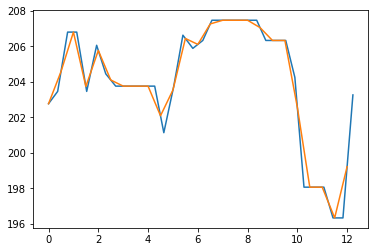

In [109]:
fig=plt.figure()
plt.plot(df)
plt.plot(dfR)
plt.show()